# Gotta plot'em all

The focus of this post is to give you an idea of how we can explore data using graphs and gain valuable insights from the same. I will be using the [Anime Recommendations Database dataset](https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=anime.csv) which is available on kaggle publically for performing this analysis. A quick toc of the topics covered in the post is as follows.

- Introduction
- Descriptive Analysis
- Visual Analysis
- References & More Reading

You may click on any of the topics above to navigate to the respective section.

# Introduction

Anime are awesome! Although I didn't grow up watching anime, my love for anime blossomed recently after watching Shigatsu wa kimi no uso and then I was just drawn right into the world of anime. Personally, I like the way in which many ideas and concepts are explained through anime - may it be the feeling of youth coursing through the veins of ambitious teenage boys and girls as in sports anime like Haikyuu, Kuroko no Basuke and Hanebado, or the dilemmas faced by a young Kaneki in Tokyo Ghoul when fighting for peace in a world where humans would co-exist with ghouls or the challenging ways of life that you must live through as expressed in Clannad & Clannad:After Story...

I can go on and on about this but let me not go on a tangent and stick to the point. Since there's lot of great anime content out there it would be awesome if one could do some data exploration (as data about anime is publically largely available) and identify the anime of their likes or their choices by having a look at the genres, other people's opinions and observations and the like. 

Human beings have a great visual perception. When data is expressed visually instead of penning it down in a langauge, it makes it's easier for us to comprehend. That's why in the world of Data Science, we resort to using all kinds of graphs, charts, plots etc. for getting insights out of data or explore the data. This is also referred to as Exploratory Data Analysis which is simply getting to know your data through visual or non-visual means and is often the first step in the Machine Learning or Deep Learning pipeline. 

Python provides a great package called seaborn which could be used in combination with the plotting capabilities of a package called matplotlib in order to visualize our data. We will go through several different plots that are commonly encountered in Data Science and use them to study about our dataset. So, without any further ado, let's get started!

# Descriptive Analysis

Before moving on to the plots, we will read in the data and do some descriptive analysis to find out important statistics pertaining to the data. We will also process the data in order to make it ready for plotting. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display, HTML

In [2]:
data = pd.read_csv('MyAnimeList/anime.csv', na_values = ['Unknown'])

In [3]:
# Have a look at missing values and the total records in the data
print(data.isnull().sum()/len(data) * 100)
print(f"Total number of records: {len(data)}")

anime_id    0.000000
name        0.000000
genre       0.504311
type        0.203351
episodes    2.765577
rating      1.870831
members     0.000000
dtype: float64
Total number of records: 12294


We can see that there are 0.5% missing fields in genre, 0.2% missing data in type and around 2% missing data in ratings. This is generally the case in many datasets. The missing data could be attributed to many causes: some of which may include incomplete data provision by the user, loss in data while scraping data from the source etc. 

When the percentage of missing data is small and the data itself is quite large i.e. more than at least a thousand record or so, in many domains, the two most commonly practised methods of dealing with this is either drop the rows with the missing values or impute them with the mean/mode of the respective column. For now, let us choose to remove the records where there's missing values. 

In [4]:
# Have a look at missing values and the total records in the  
# data after dropping records with missing data
data = data.dropna(axis = 0)
print(data.isnull().sum()/len(data) * 100)
display(HTML(data.head(5).to_html()))
print(f"Total number of records: {len(data)}")

anime_id    0.0
name        0.0
genre       0.0
type        0.0
episodes    0.0
rating      0.0
members     0.0
dtype: float64


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51.0,9.16,151266


Total number of records: 11830


Have a look at the descriptive stats of the records. 

In [5]:
data.describe(include = 'all')

,anime_id,name,genre,type,episodes,rating,members
count,11830.000000,11830,11830,11830,11830.000000,11830.000000,1.183000e+04
unique,NaN,11828,3217,6,NaN,NaN,NaN
top,NaN,Shi Wan Ge Leng Xiaohua,Hentai,TV,NaN,NaN,NaN
freq,NaN,2,785,3568,NaN,NaN,NaN
mean,13404.150211,NaN,NaN,NaN,12.486729,6.484609,1.851100e+04
std,11110.087616,NaN,NaN,NaN,47.097131,1.019147,5.537144e+04
min,1.000000,NaN,NaN,NaN,1.000000,1.670000,1.200000e+01
25%,3326.250000,NaN,NaN,NaN,1.000000,5.892500,2.322500e+02
50%,9820.500000,NaN,NaN,NaN,2.000000,6.570000,1.589500e+03
75%,23302.500000,NaN,NaN,NaN,12.000000,7.190000,9.832000e+03


In [6]:
data.describe()['members']['mean']

18511.002789518174

We can see that on an average, there are 12 episodes per anime and the mean rating of all the anime is around 6.5 Also, the average number of members on the MyAnimeList platform who are talking about the anime are around 18.5k which is quite substantial so to speak. One thing to note is that with respect to the episodes and members, the variance is quite high; this indicates that unlike rating where a substantial amount of ratings are centered around 6.5, in episodes and members, the distribution is rather quite flat and doesn't peak around the mean. We will explore this more in detail in the histogram section below.

Also, amongst categorical columns, we can see that most of the anime are TV anime and the most prevalent genre amongst all the anime is Hentai with 785 entries. This is a misleading stat, which I will explain why in the section on histogram and countplots.

In [7]:
data.sort_values(by = 'rating', ascending = False).head(5)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1.0,10.00,13
9595,23005,Mogura no Motoro,Slice of Life,Movie,1.0,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1.0,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665


The top 5 anime by ranking are all movies and one TV anime. I am trying to be objective here but I would really want you to watch Kimi no Na wa and don't forget to watch weathering with you succesively to find out what Taki and Mitsuha are currently doing in their lives as well!

Now, on the other hand Taka no Tsume, Mogura no Motoro and Kahei no Umi are anime whose members are really really small. This means that there's a few people who watched them and they all liked them a lot. Since the number of members here is quite small, I would be a little reluctant to watch them even if they're rated high (Unless I get to see what the members have described for these 3 movies). 

In [8]:
data.sort_values(by = 'members', ascending = False).head(5)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37.0,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.0,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.0,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.0,8.39,717796


Whatsay guys, doesn't this make sense? Every otaku has at least heard if not seen these anime. Also, most of them have been around for around a decade or more. With the passage of time, as the fame of a series grows, more diverse people watch it and some people out of those will dislike it which makes the ratings take a slump compared to the high rating of Taka no Tsume in the previous example which had only 13 members. 

In [9]:
data.sort_values(by = 'episodes', ascending = False).head(5)

,anime_id,name,genre,type,episodes,rating,members
6296,12393,Oyako Club,"Comedy, Slice of Life",TV,1818.0,6.18,160
929,2471,Doraemon (1979),"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,1787.0,7.76,14233
9243,23349,Kirin Monoshiri Yakata,Kids,TV,1565.0,5.56,116
5360,6277,Manga Nippon Mukashibanashi (1976),"Fantasy, Historical",TV,1471.0,6.48,406
6580,8213,Hoka Hoka Kazoku,Comedy,TV,1428.0,6.05,194


Just for fun, have a look at the anime which have had a lot of episodes, no doubt Doraemon makes it to the list. Every millenial will remember seeing Doraemon at least once somewhere on TV or poster or merchandise. But with this limited set, we can see that more episodes doesn't necessarily mean higher rating or vice versa. 

# Visual Analysis

Now that we have an idea of the descriptive statistics for the dataset, let's try to visually analyze the datasets. We will be understanding and using several different kinds of plots to visualize the data using seaborn. 

Before that, we need to be aware of the two main kinds in which fetures of a dataset fall into. 

1. Categorical variables - The variables which take discrete values are called categorical variables. They could be numeric in nature or even non-numeric eg. Grades in an exam (A, B, C etc.), Rankings (1st, 2nd, 3rd), signs on a traffic signal (Red, Yellow, Green) etc. There's no 1.5th rank or a purple signal or a grade in between A and B. The values which these variables can take are one out of a pre-defined set. That being said, there could exist a hierarchy in the categories ( A > B > C ) or no hierarchy (like Red, Yellow, Green). The former are called ordinal variables and the latter are called nominal varibles. Irrespective of nominal or cardinal, they're both categorical variables.

2. Numerical variables - The variables which take continuous values like weight/height of a person, amount per sq feet of a property, cost of gold etc. are called numerical variables. 

Based on whether a variable is numeric or categorical, we can resort to different sorts of plots in order to visually convey the relationship between them. 

Following are the different types of charts we will be covering in the subsequent section.
- Histograms/Count plots
- Bar charts
- Pie charts
- Box Plot and Violin Plot
- Scatter Plot
- Heatmaps

# Histograms & Countplots

Let us first look at histograms. 

## Histograms

Just looking at the mean and standard deviation you can only get a rough idea of the distribution of a variable; histograms help to actually visualize the distribution of a variable. 

When we have a continuous variable, we create a histogram and when we have a discrete variable, we create a countplot. We will therefore create a countplot of the genres and a histogram of ratings to see the distribution of these variables respectively using matplotlib and seaborn.

In [10]:
from utils import Utils
Utils.histogram(data, "rating")
Utils.histogram(data, "members", 50)

Looking at the two plots, we can actually see that the mean is a good estimate of the overall population for rating because most of the ratings are contained in a region very tightly bound around the mean. The continuous line which is overlaid on top of the bins is called as the kernel density estimate and it is an estimator fit to approximate the frequenies of the observations for all continuous values in the range of that particular variable.

In members, we can see that there's certain anime for which there are a lot of members and for many of them, there's very very few members. This behavior is very natural so to speak, because out of a lot of anime that are out there, some end up being very very popular and the members/followers for those anime are huge but the little known ones don't have many people talking about them...

That is why we observed in the describe table that the standard deviation for members is huge compared to the mean of the same as against the standard deviation of rating compared to it's mean.

## Countplots

Countplots are very similar to histograms with the only difference that they are used for discrete variables. Just as the name suggests, it counts the number of entries for a particular category and simply plots them as bars. Let's try to visualize the counts of genres to see which genre is the most popular among all anime. 

We need to perform some preprocessing steps for genres. Since an anime has multiple genres, we'll first have to create a separate table for the counts of genres and create a countplot of the same. Let's do it!

In [11]:
Utils.genre_countplot(data, 'genre')

Now looking at this we can see that actually speaking, comedy is the most common genre unlike hentai which was supposedly the most common before we did the preprocessing and plotting. 

# Barcharts

When we have a categorical variable and a numerical variable, we can resort to using barcharts. Depending on whether the categorical column is on x-axis or on y-axis, the chart is synonymously called vertical bar-chart or horizontal bar-chart respectively. 

Let's study rating and episode(numerical variable) with respect to the type(categorical variable). This is a good use-case to study from the perspective of a barchart.

In [12]:
Utils.barplot(data, 'type', 'rating')
Utils.barplot(data, 'type', 'episodes')

We can see that on an average, the rating is pretty much between 5 and 6 for any type of anime.

However, for TV, the number of episodes seems to be on the higher side of around 35 episodes per anime on an average. For movies, specials and OVA, it is around 1 or 2 and for ONA, it's around 5 episodes per anime respectively. 

# Piecharts

To visualize the distribution of counts of a categorical variable, we can use piechart as an alternative to countplot to better understand the relative proportions in a percentage-wise manner. Let's see the pies of types and genres.

In [13]:
from collections import Counter
typedata = Counter(data.type)

all_genres = []
for item in data.genre:
    item = item.strip().split(', ')
    all_genres.extend(item)

genredata = Counter(all_genres)

In [14]:
Utils.pieplot(typedata, "type")
Utils.pieplot(genredata, "genre")

Looking at the charts above, we can see that when the number of levels in a category is high, the pie-chart is not a good way to visualize the data because the data cannot be aesthetically and semantically analyzed well. Going for the traditional countplot is a good idea then.

However, for a relatively small number of levels, it is quite effective in communicating a percentage split which colloquially strikes close to the understanding of many folks. We can see that TV, OVA and Movies are predominant in the anime industry whereas Specials, ONA and music anime are relatively less in number. 

# Boxplot and Violinplots

## Boxplot

A histogram is a good way to study the distribution of data however it's sometimes extraneous and most of histogram's information could be conveyed more concisely with another plot called boxplot or a box & whisker plot. It is a compressed version of histogram where you come to know about the median and quartiles and you can use the same for flagging potential outliers. A detailed explanation of how to use the boxplot can be found in [this article](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/).

Basically we're interested in finding out quartiles and confirming that most of the data lies within the IQR and the whiskers. Those that lie outside these range are potential outliers, they need to be investigated and if found alright, they will be considered in future analysis, else these records are blocked. 

<img src="https://flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif">

So, let's visualize the boxplot of ratings and see how it varies with the type variable as well.

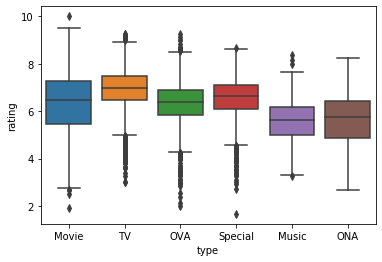

In [15]:
sns.boxplot(y = 'rating', x = 'type', data = data);

We can see that there are a substantial amount of outliers especially on the lower side for TV, OVA and specials. This calls for attention at those points which are far outside the normal rating margins. Why were they rated the way they were? Were the ratings forged, did some negative publicity impact these set of anime, were they rated by enough number of people or was the rating obtained only on the basis of 1 or 2 reviews for those anime? 

This plot thus helps us identify the records which could be anomalous and we need to further dig in to make sure those anomalies are genuine and make a call on whether to keep those for our analysis or not.

One more thing to note is that sometimes the range of the y-variable can vary exponentially. In such cases, taking a log transform before plotting the boxplot could really help make things more interpretable.

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

Utils.boxplot(data, "type", "members", ax[0], log = False)
Utils.boxplot(data, "type", "members", ax[1], log = True)

plt.savefig('./img/boxplot_members_type')
plt.close()

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

Utils.boxplot(data, "type", "episodes", ax[0], log = False)
Utils.boxplot(data, "type", "episodes", ax[1], log = True)

plt.savefig('./img/boxplot_episodes_type')
plt.close()

We can see that for the plain figure, it's very difficult to interpret the boxplot since most of the data is concentrated in such a short interval and the spread of data is huge. In order to mitigate this, we can take a log transform and then study the distribution.

We can see that with respect to members, there's a few potential outliers in OVA and music and when it comes to episodes, there's several issues with most of the categories. 

A movie must have only 1 episode, any more calls for suspicion. The graph says there are some such datapoints. Probably it was mislabelled Movie when it should've been TV or vice versa. Let's find out.

In [18]:
data[(data.type == "Movie") & (data.episodes > 1)]

,anime_id,name,genre,type,episodes,rating,members
63,21899,Gintama: Yorinuki Gintama-san on Theater 2D,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,2.0,8.60,11104
411,1689,Byousoku 5 Centimeter,"Drama, Romance, Slice of Life",Movie,3.0,8.10,324035
783,1462,Memories,"Drama, Horror, Psychological, Sci-Fi",Movie,3.0,7.84,38643
1370,1911,Top wo Nerae! &amp; Top wo Nerae 2! Gattai Mov...,"Comedy, Mecha, Shounen",Movie,2.0,7.57,8079
1968,3508,Genius Party,"Action, Dementia, Fantasy, Mecha, Music, Psych...",Movie,7.0,7.39,18612
1969,6795,Genius Party Beyond,"Dementia, Fantasy, Music, Sci-Fi",Movie,5.0,7.39,10660
2418,27539,Pikmin Short Movies,"Fantasy, Kids",Movie,3.0,7.27,406
2546,2962,Digimon Adventure 02 Movies,"Adventure, Fantasy, Kids, Sci-Fi",Movie,2.0,7.23,26543
3259,1951,Manie-Manie: Meikyuu Monogatari,"Adventure, Fantasy, Horror, Sci-Fi, Supernatural",Movie,3.0,7.04,9568
3703,2611,Panda Kopanda,"Comedy, Kids",Movie,2.0,6.91,4922


Although I haven't personally seen all these, I have seen Byousoku 5 centimeter. It is a movie with 3 short stories. That is probably why the number of episodes are 3 in this case which is excusable.

However, Goman-hiki and Kami Usagi Rope are controversial with 100 and 14 episodes respectively for a movie premiere. They are questionably TV series but since they have an underlying story and are very short episodes, collectively they could be clubbed as a movie. 

Now, it's the discretion of the data scientist here whether to consider these records as movies, or series or to drop them completely. No approach is wrong it's just the thought process of an individual and his way of reasoning to justify the exclusion/inclusion/alteration of records that count here.

## Violinplot

Imagine the best of histogram and boxplot coming together - that's what violinplots are. The kernel density estimate that we saw in histograms is overlaid on top of the box and whiskers plot Not only this gives us the median, IQR and whiskers but also an overview of the nature of distribution all in one single plot. 

Although it's so information dense, the aesthetics and a lack of simplicity are what limit their use in the real world; however, for presenting information to people who're aware of this plot and what it represents, I personally can't think of a better alternative than a violinplot.

Let's make a violinplot for the categories for ratings.

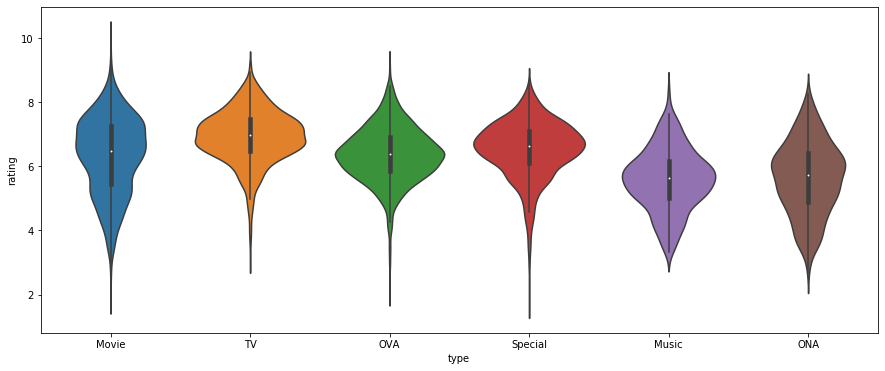

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
sns.violinplot(y = 'rating', x = 'type', data = data, ax = ax);

We can observe clearly the spread and the potential outliers. Although movies have most dispersed ratings, they don't have a lot of outliers whereas in OVA, we can see that a substantial portion of data extends beyond the whiskers which suggest presence of several outliers. 

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

Utils.violinplot(data, "type", "members", ax[0], log = False)
Utils.violinplot(data, "type", "members", ax[1], log = True)

plt.savefig('./img/violinplot_members_type')
plt.close()

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

Utils.violinplot(data, "type", "episodes", ax[0], log = False)
Utils.violinplot(data, "type", "episodes", ax[1], log = True)

plt.savefig('./img/violinplot_episodes_type')
plt.close()

From the violinplot of members, we can see in addition to most of the data being contained within IQR, the concentration of data is not only around the mean but dispersed quite a bit across the range.

On the other hand, when we compare the violin plot of episodes wrt type, most of the types have ridiculously some records with ridiculously large number of episodes for that particular type of anime (as we saw above from the box plot).

# Scatterplots

When we need to study the variation between two continuous variables, we resort to using scatterplots. They help us understand the correlation between these two variables i.e. if one variable increases, does the other increase, decrease or stay unaffected. 

They serve a good visual check to gauge the performance of linear regression model or rather set expectations for the performance of a regression model before actually building one. Seaborn provides a good functionality of overlaying a regression line on top of the scatterplot to address this point.

Let's see the correlation of ratings as a function of members, presumably I expect that they should be directly proportional since highly rated anime will have more members following the anime and vice versa.

In [22]:
Utils.scatterplot(data, "members", "rating")

As we can see the bulk of datapoints concentrated in 0 to 400000 members show a positive relationship i.e. increase in one causes increase in another. 

Keep in mind that the y axis, in reality is constrained in between 0 to 10. There can't be a score greater than 10, this is why although a lot of people love some anime, they will be forced to give a rating not more than 10, even if they liked it a lot. In absence of this constraint, I predict that the line and the points in higher 100000s of members would have been still more close to one another.

Let's do one more, let's see the relationship between number of episodes and the rating of a show.

In [23]:
Utils.scatterplot(data, "episodes", "rating")

It does seem that there's a positive correlation between episodes and rating but it's not as strong as observed between memebers and ratings. Also, the 95% CI band is wider for this model which means, the regression line isn't as good a fit as the one between members and ratings. 

This is how we can use scatterplots to gain an understanding of how two quantities vary with respect to one another. 

# Heatmap

Another useful visual is that of a heatmap. When we have two categorical variables and a numerical measure associated with each pair of those two categorical variables, heatmaps are a very good tool to visualize the same. We could see how many anime belong to a particular genre and a particular type and build a heatmap of the counts of same or a heatmap of the ratings of the same and show it aside as a colorscale.

Let's first look at making a heatmap of counts of type and genre of anime to get a feel for the heatmaps.

In [24]:
# Get a list of all the unique types
types = data.type.unique()

# Create a mapping between genre and type and initialize it to all zeros
mapping = pd.DataFrame(np.zeros((len(genredata.keys()), len(types)), dtype = np.int), index = list(genredata.keys()), columns=types)
rating_mapping = pd.DataFrame(np.zeros((len(genredata.keys()), len(types)), dtype = np.float), index = list(genredata.keys()), columns=types)

# Each time an item is encountered for genre and type, increment the count by 14
# Each time an item is encountered for genre and type, increment the rating by the respective rating
for item in genredata.keys():
    for row in data.itertuples():
        if item in row[3]:
            mapping.loc[item, row[4]] += 1
            rating_mapping.loc[item, row[4]] += row[6]

# Divide the rating by the counts to get average rating for the pair
rating_mapping = rating_mapping / mapping

In [25]:
Utils.heatmap(mapping, "Type", "Genre")
Utils.heatmap(rating_mapping, "Type", "Genre", quantity = "Rating")

We can visually see from the type genre heatmap for occurrences that there's a few combinations which have a lot of anime made and some others where there's none.

For eg. We don't have any Shounen musicals or Hentai TV or Josei ONA anime and on the other hand, we have a lot of TV Comedy, Sci-Fi OVAs, Slice of life TVs and so on. The highest encountered combination is TV Comedy and Hentai doesn't appear on TV which makes sense since TVs are watched by everyone in a household and children shouldn't be exposed to sensitive content at an early age.

If we look at the heatmap average ratings for the type genre combinations, most of them have around 5-6 as their average ratings and some of the combinations since absent have zero ratings (the ones in white). The highest rated shows are Josei Movies followed by TV Thrillers followed by police movies and so on (in short stuff involving suspense, intrigue and teen love/teen comics are well received on an average by the viewer community).

That's all for this post folks! Hope you found it useful. The code and other stuff that goes along with this post can be found in my github repo here. EDA and especially plotting are some awesome tools which can help you understand and communicate this understanding well. I hope the plots mentioned here become an invaluable tool in your toolbox for solving data science problems :).

# References & More Reading

1. [Anime Recommendations Database on Kaggle](https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=anime.csv)
2. [Understanding boxplots](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/)
